### PowerTransformer

### Function Transformer
1. Log transformer
2. square transformer
3. sqrt transformer
### Power Transformer
1. Box-cox
2. Yeo-Johnson

### Box cox transform 
normal distribution ma transform garxa elle chai lambda liyera x ko power chai kati lida chai thik hunxa bhanera with range -5 to 5 we try every value and chhose the best one which make its best for distribution 
1. Strictly applicable for only those value which are greater than 0 otherwise not
   

### Yeo - Jhonson transform 
this is just the minor modification of the box-cox transform box-cox ma chai 0 bhanda thullo value matra linxa tara esma chai 0 lai ni linxa so it is just the adjustment of the box cox transform

Power tranform nai use garne ho hamle chai 

In [8]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [14]:
df = pd.read_csv('concrete_data.csv')

In [16]:
df.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [18]:
df.shape

(1030, 9)

In [20]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [22]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [24]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [32]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test , y_pred)

0.6275531792314852

In [36]:
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628667

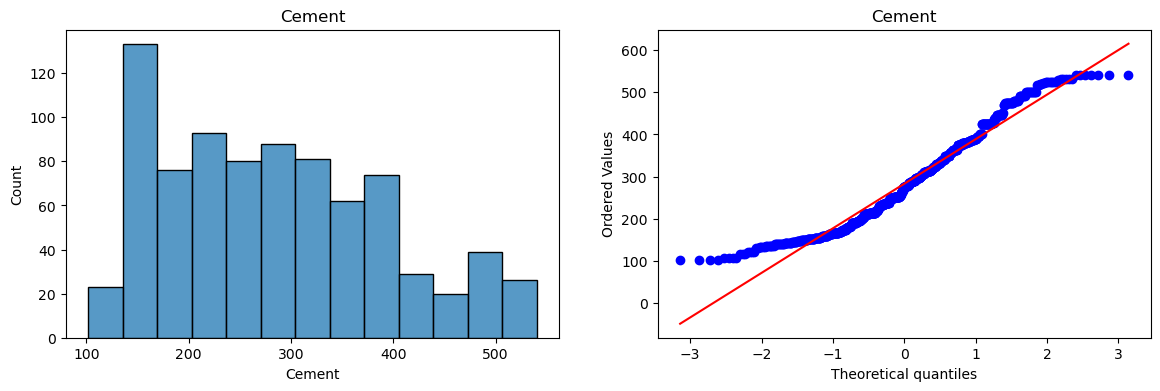

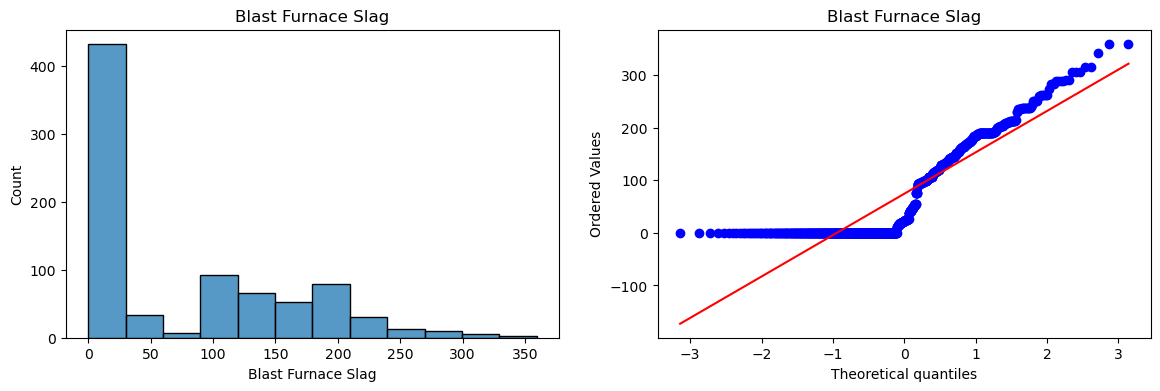

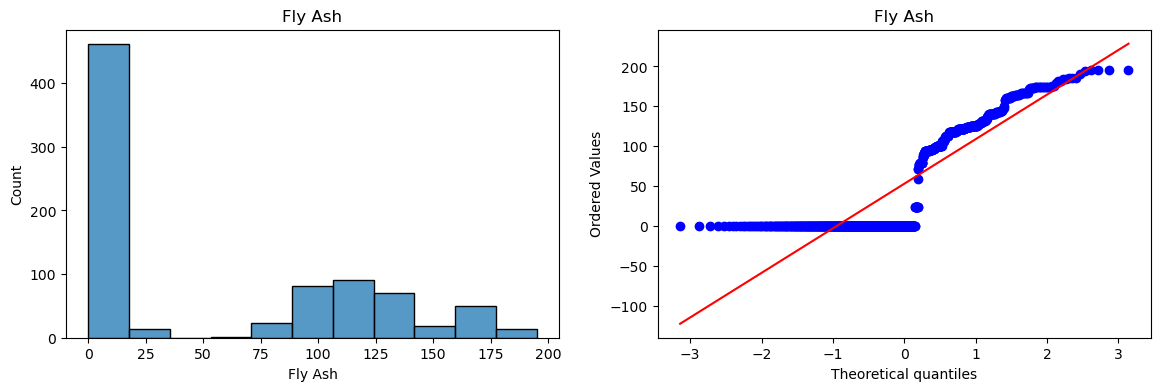

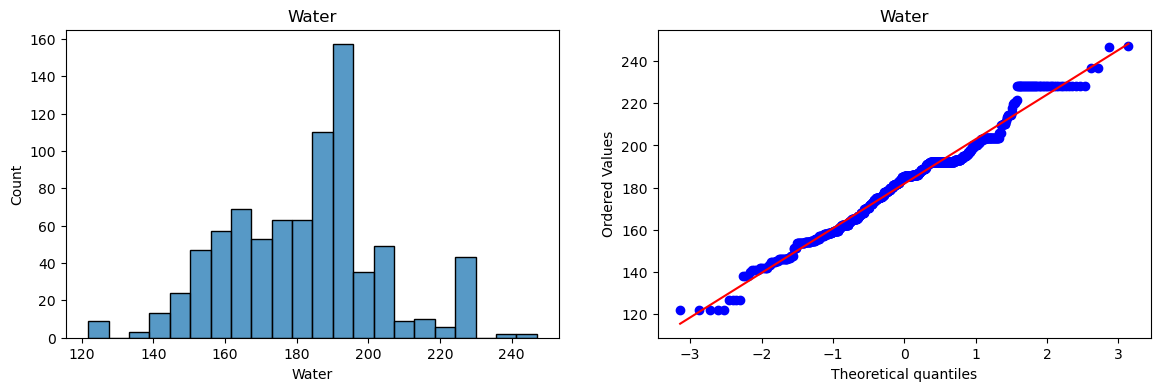

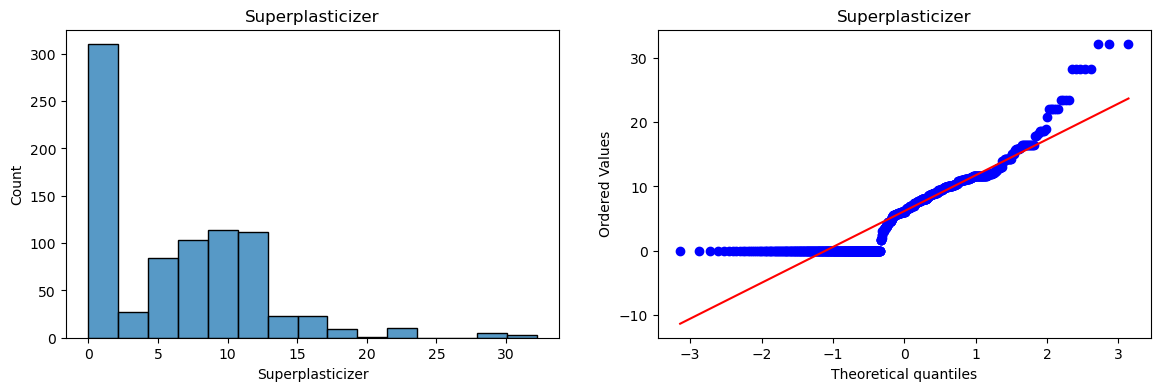

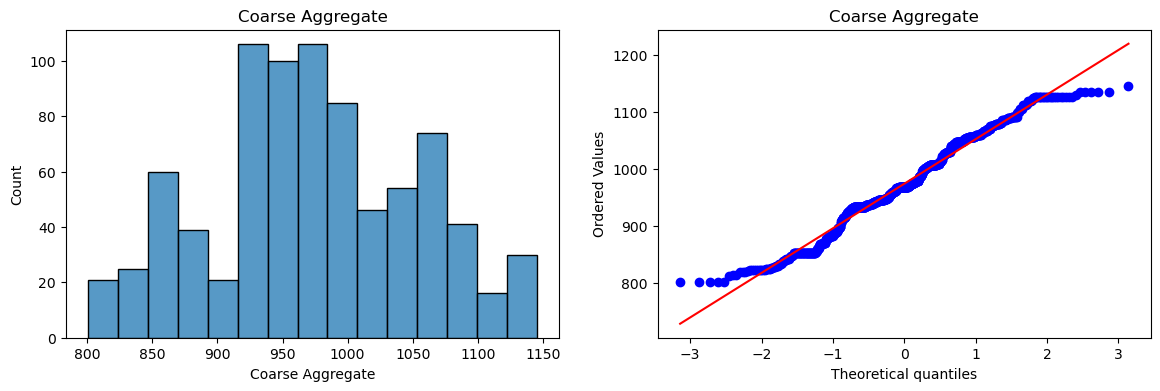

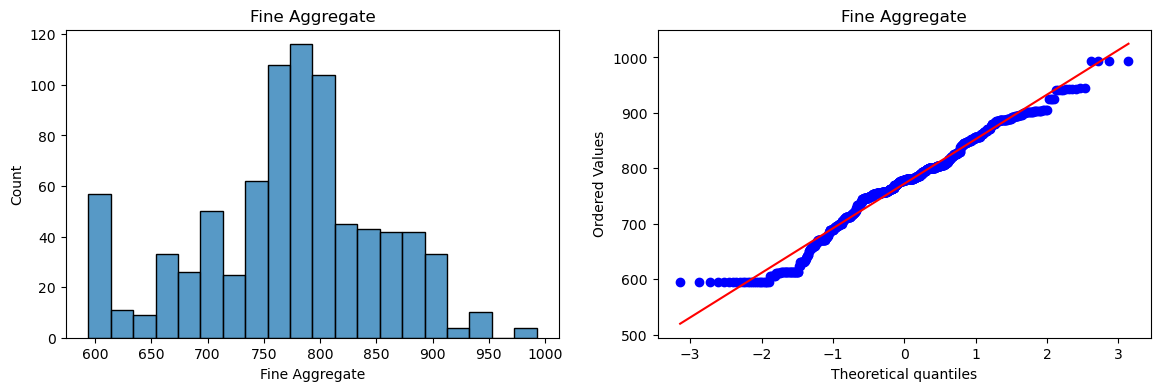

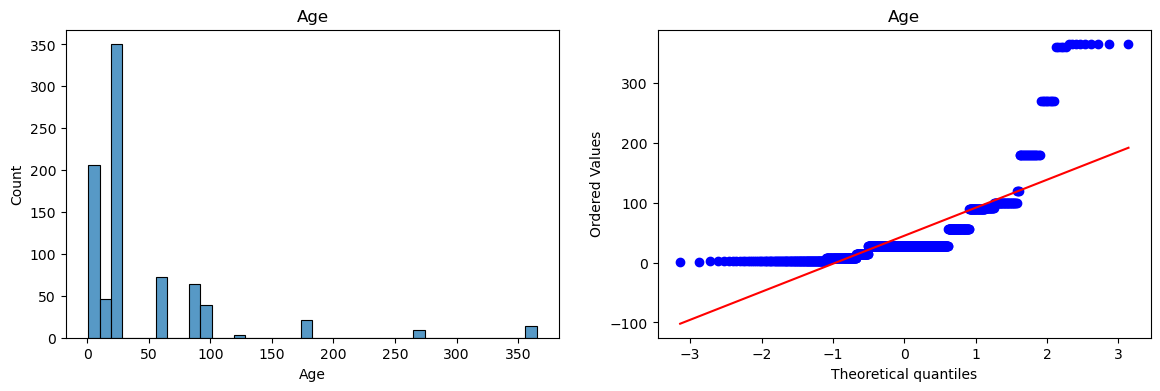

In [40]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col])
    plt.title(col)
    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)

plt.show()

Applying box cox transform

In [49]:
pt = PowerTransformer(method = 'box-cox')
X_train_transformed = pt.fit_transform(X_train + 0.0000001)
# box cox ma chai + 0.000001 garera gareko kinki 0 lidina elle chai 
X_test_transformed  = pt.transform(X_test + 0.0000001)
# Step 1: Extract column names and lambdas
column_names = X_train.columns
lambdas = pt.lambdas_
# harek column ko lagi lamda calculate garera garne sabai column ma labda power linxa

# Step 2: Create a DataFrame
result_df = pd.DataFrame({
    'cols': column_names,
    'box_cox_lambdas': lambdas
})
result_df


,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.022767
2,Fly Ash,-0.034635
3,Water,0.772682
4,Superplasticizer,0.087141
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [51]:
lr = LinearRegression()
lr.fit(X_train_transformed , y_train)
y_pred2 = lr.predict(X_test_transformed)
r2_score(y_test , y_pred2)
# aba distribution garda chai accuracy badyo 

0.8042534512206333

C:\Users\saksh\AppData\Local\Temp\ipykernel_27192\47740962.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\saksh\AppData\Local\Temp\ipykernel_27192\47740962.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])
C:\Users\saksh\AppData\Local\Temp

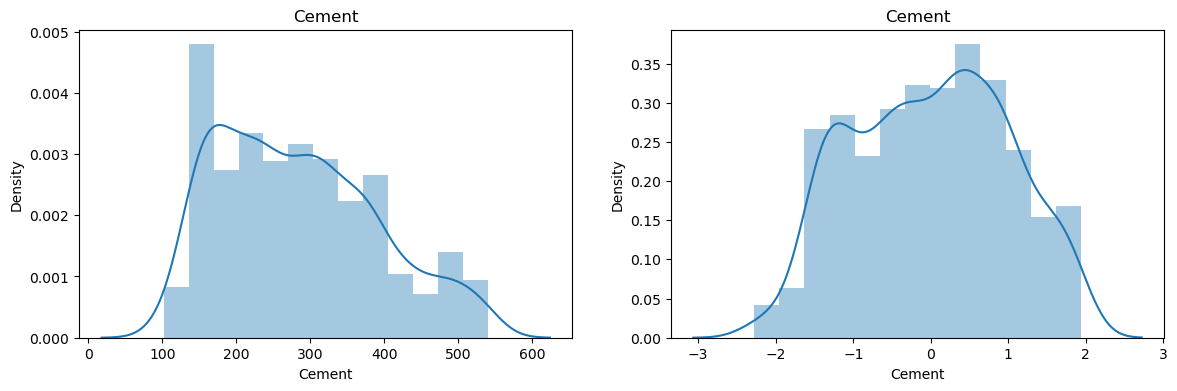

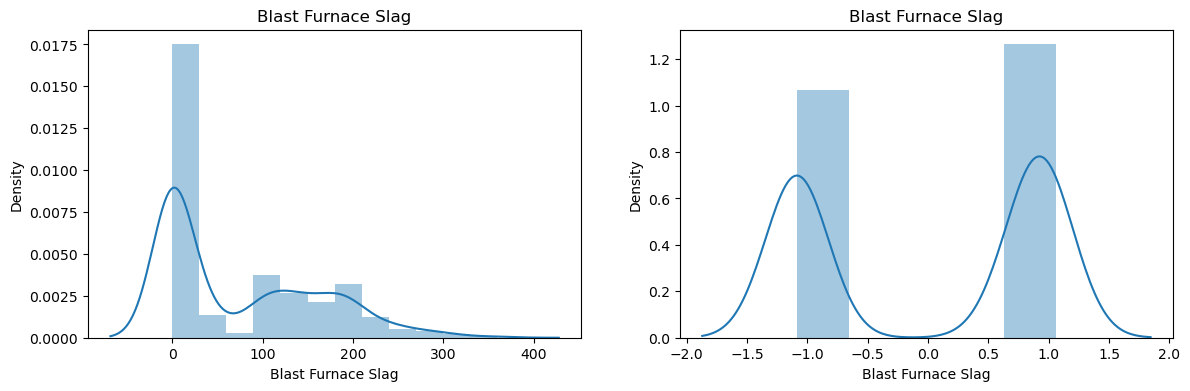

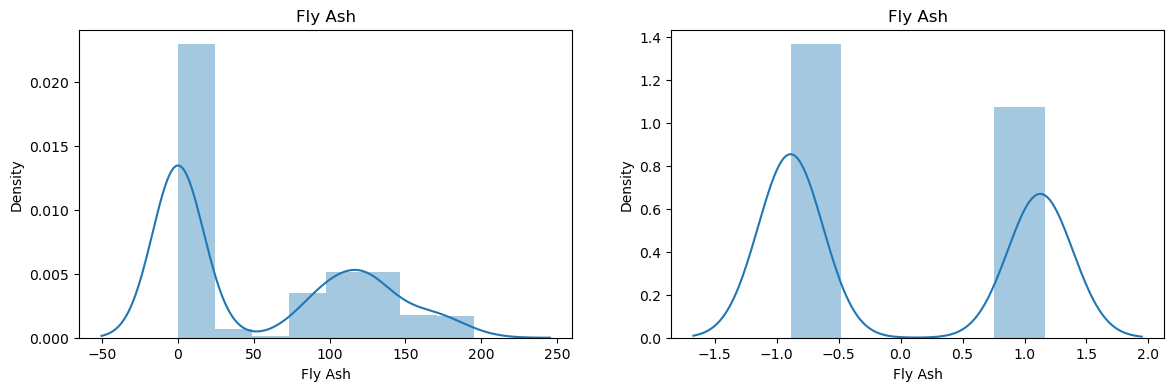

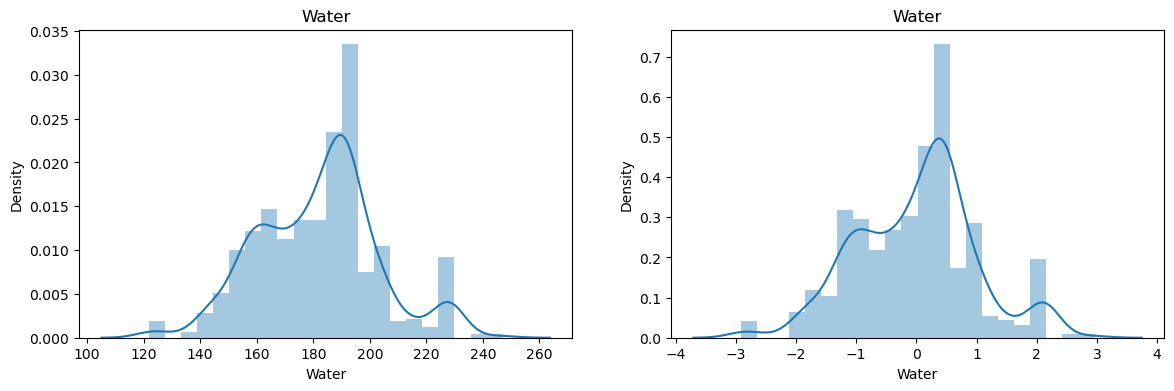

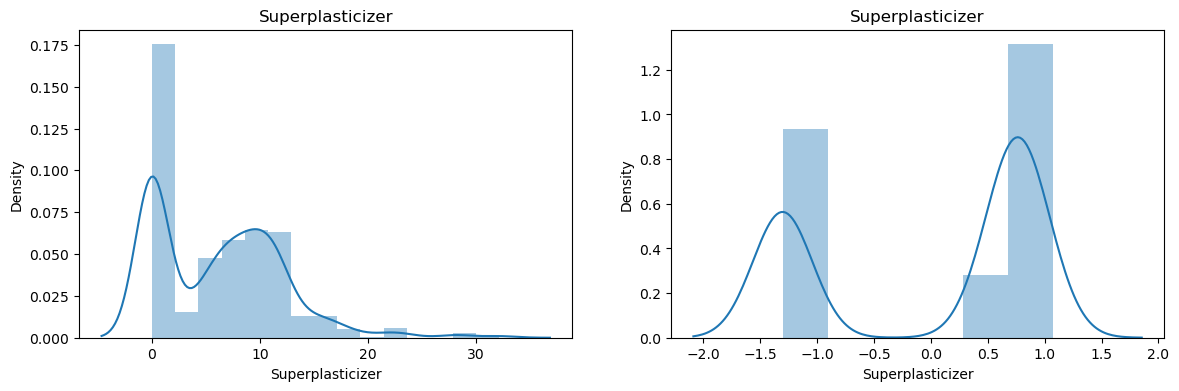

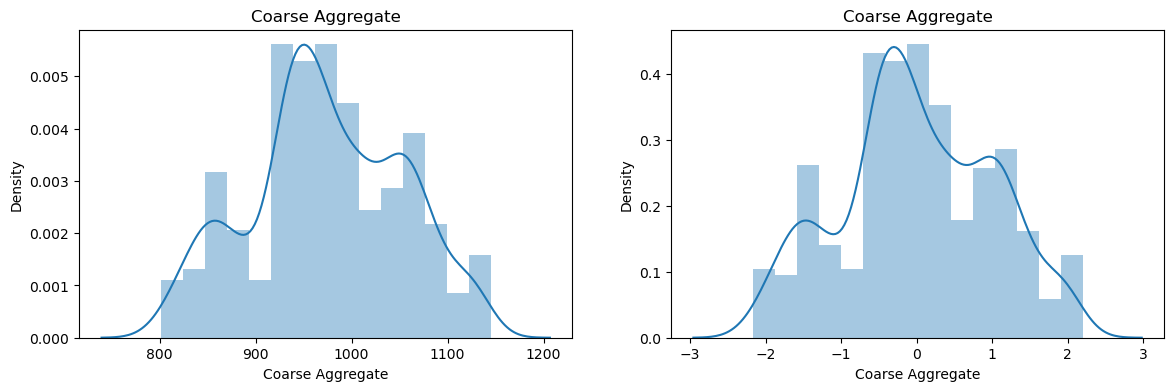

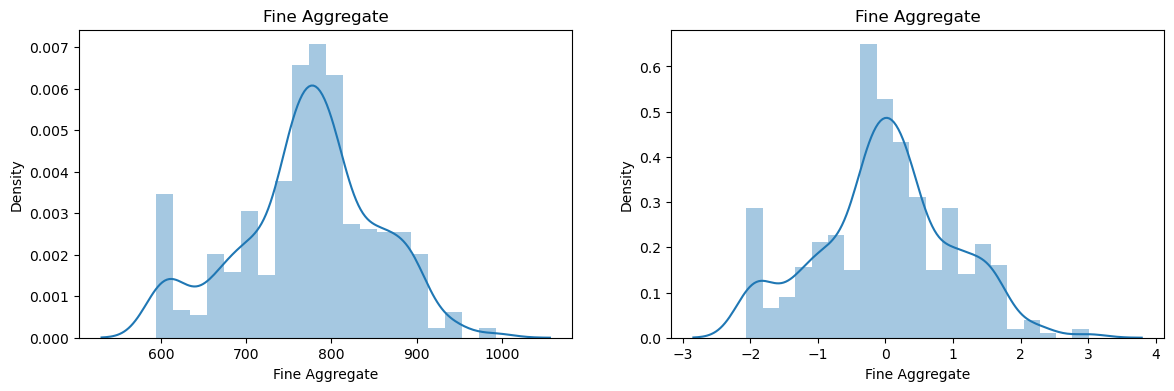

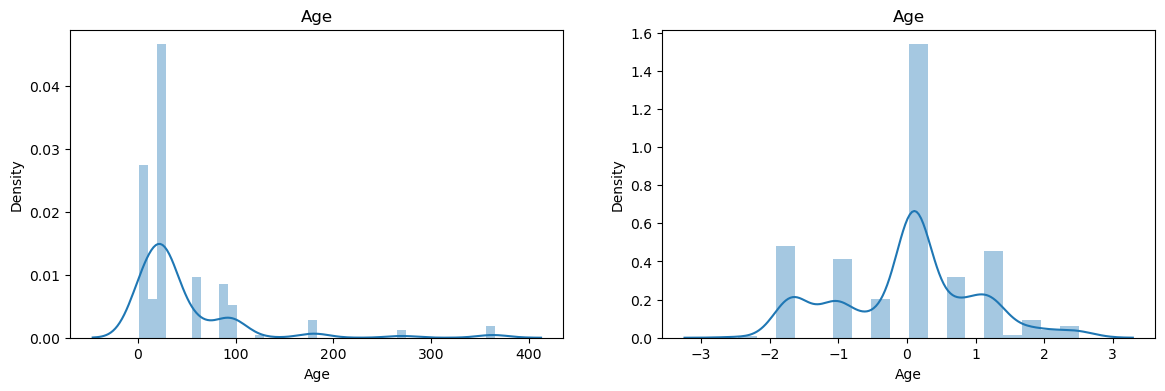

In [57]:

# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)


Apply Yeo-Jhonson

In [60]:

# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906513354853


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [62]:

# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625141500867

In [64]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

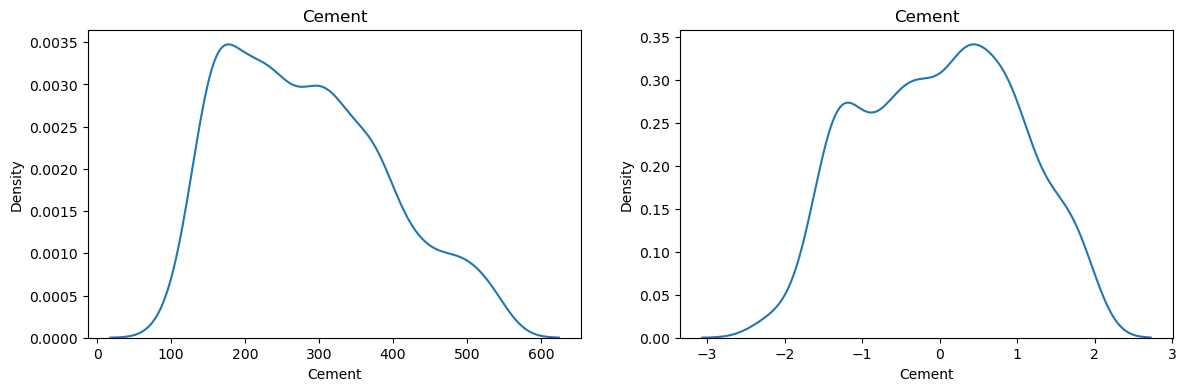

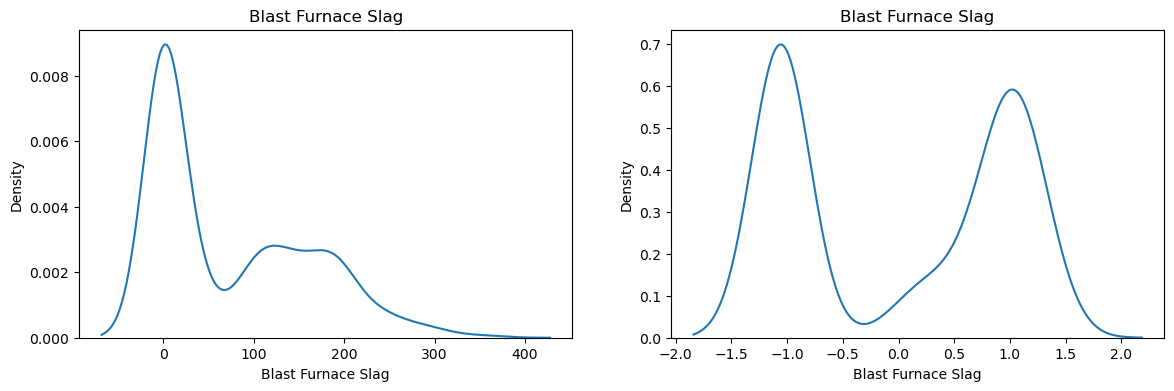

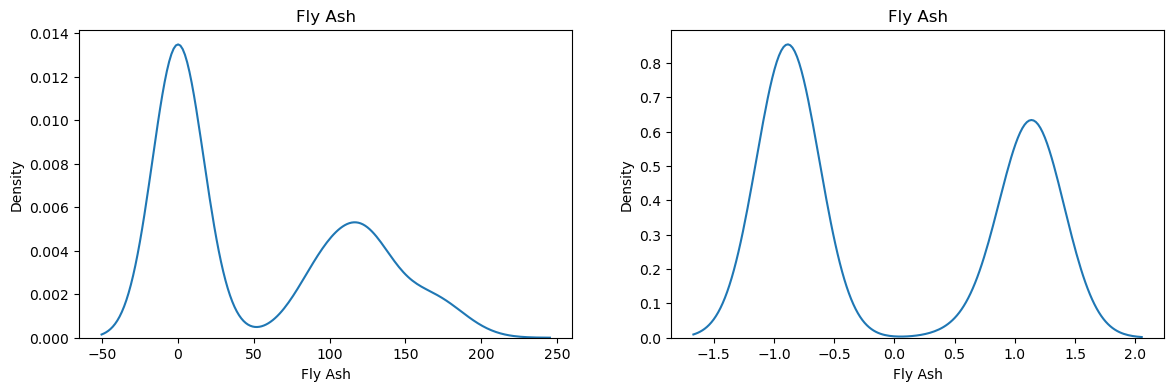

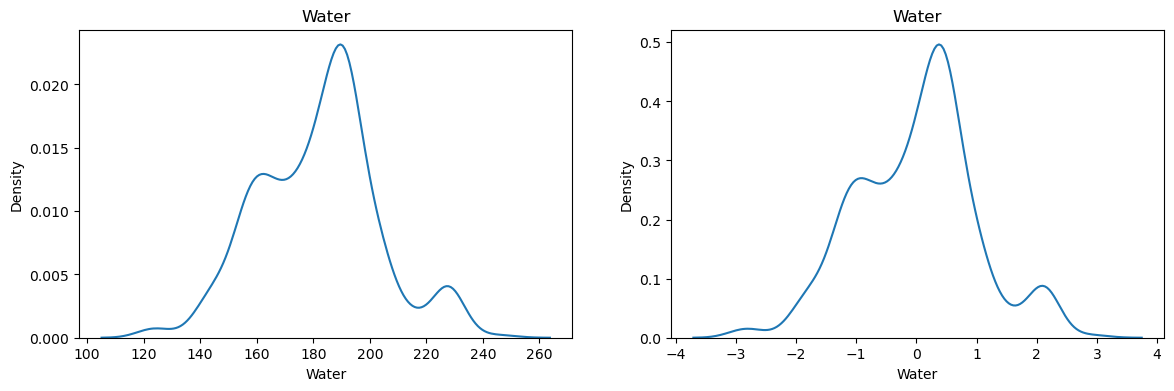

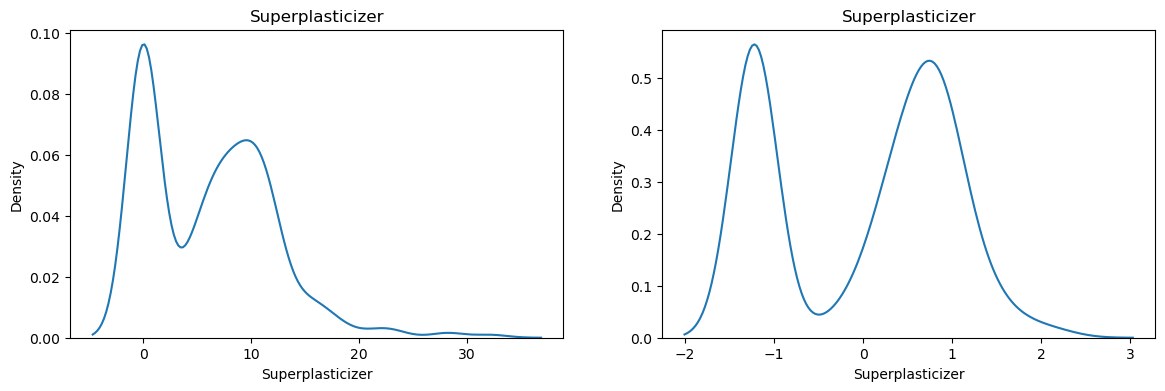

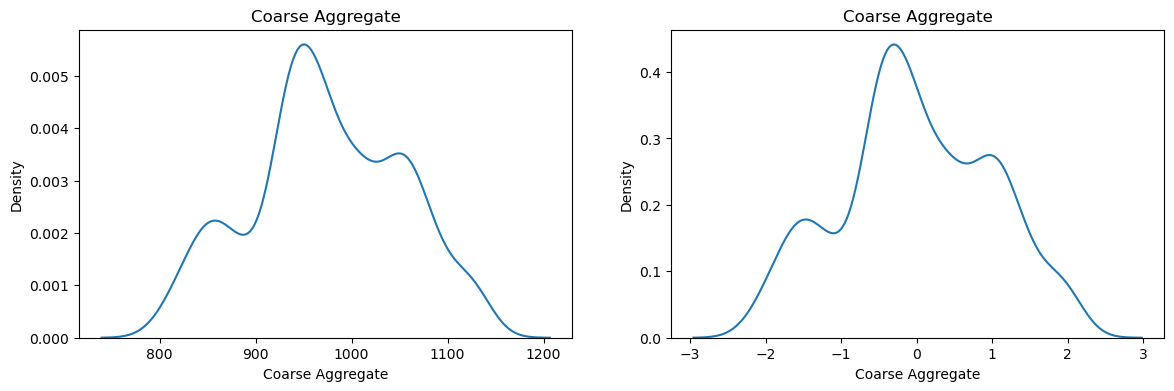

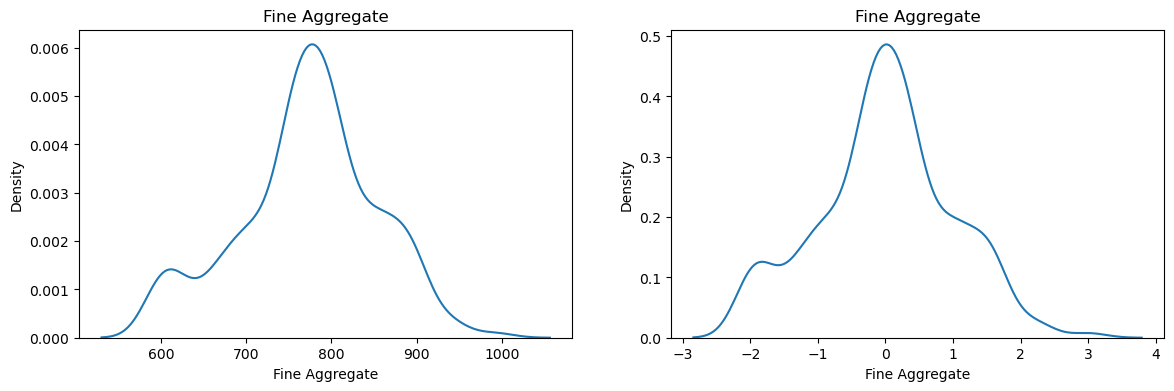

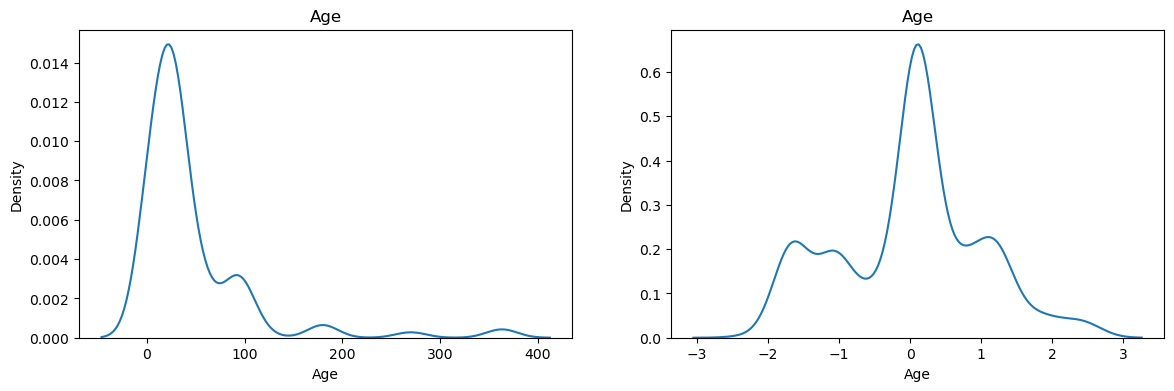

In [70]:
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

In [72]:
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885
